In [7]:
import torch
a = torch.load('output_checkpoints/experiment_1/recipe_state.pt')

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f33163af8d0>>
Traceback (most recent call last):
  File "/root/miniconda3/envs/base11/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [ ]:
a['optimizer']

{'state': {1: {'step': tensor(5050.),
   'exp_avg': tensor([[-4.0978e-07, -1.6093e-06,  2.8312e-06,  ..., -1.4231e-06,
             7.7998e-09, -1.0505e-06],
           [-1.1846e-06,  7.1526e-07, -1.0729e-06,  ...,  2.9430e-07,
             5.9232e-07,  3.3900e-07],
           [-2.3562e-07, -4.9919e-07,  5.9232e-07,  ..., -3.0361e-07,
            -1.3039e-06, -1.5125e-06],
           ...,
           [-8.1584e-07,  1.1846e-06, -6.6683e-07,  ...,  1.6112e-07,
             5.3048e-06,  5.4240e-06],
           [ 1.9930e-07,  6.8918e-07, -1.6168e-06,  ...,  7.4133e-07,
            -1.2517e-06, -1.0729e-06],
           [-3.9674e-07, -1.0012e-07,  9.0152e-07,  ..., -8.0559e-08,
             2.0768e-07,  2.4736e-06]], device='cuda:0', dtype=torch.bfloat16),
   'exp_avg_sq': tensor([[2.9104e-10, 1.2824e-10, 6.0027e-10,  ..., 1.1914e-10, 1.0768e-09,
            4.4238e-09],
           [3.2560e-10, 1.3370e-10, 7.4942e-10,  ..., 1.1642e-10, 1.5716e-09,
            3.5507e-09],
           [4.9477e-

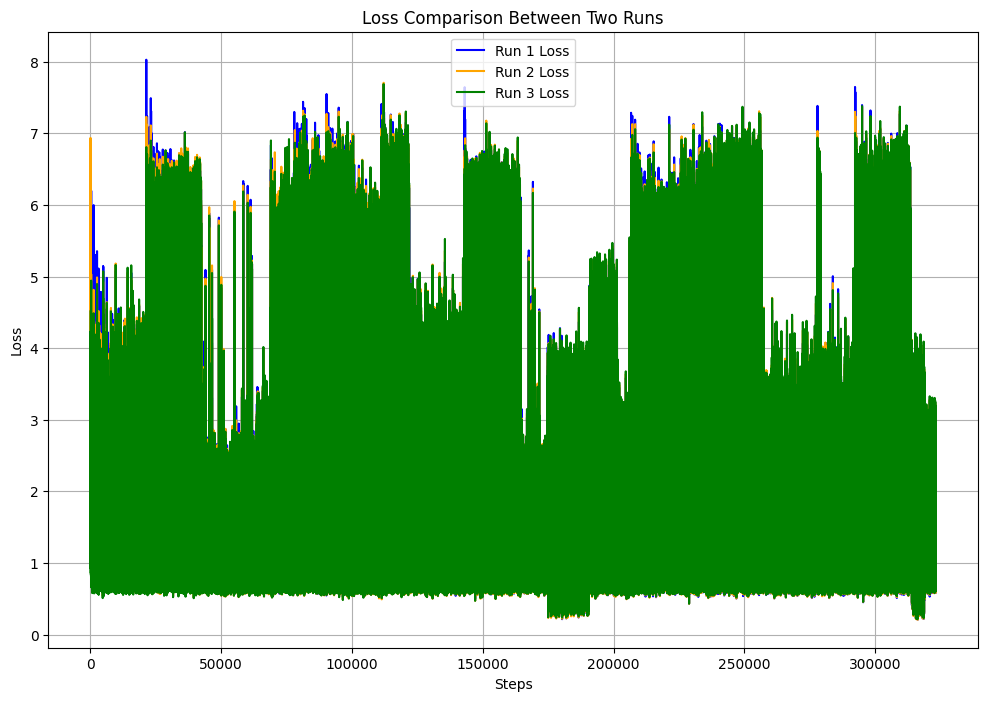

In [11]:
import matplotlib.pyplot as plt
import re

# Function to parse the file and extract step-loss pairs
def parse_loss_data(file_path, pattern):
    loss_data = {}
    with open(file_path, "r") as file:
        for line in file:
            match = pattern.search(line)
            if match:
                step = int(match.group(1))
                loss = float(match.group(2))
                loss_data[step] = loss  # Dictionary ensures unique steps
    return zip(*sorted(loss_data.items()))  # Sorted step-loss pairs

# File paths
file_path_1 = "run1.log"
file_path_2 = "run2.log"
file_path_3 = "run3.log"


# Regular expression to extract step and loss
pattern1 = re.compile(r"1\|(\d+)\|Loss:\s([\d.]+)")
pattern2 = re.compile(r"2\|(\d+)\|Loss:\s([\d.]+)")
pattern3 = re.compile(r"3\|(\d+)\|Loss:\s([\d.]+)")


# Parse both files
steps1, losses1 = parse_loss_data(file_path_1, pattern1)
steps2, losses2 = parse_loss_data(file_path_2, pattern2)
steps3, losses3 = parse_loss_data(file_path_3, pattern3)

# Plot the data
plt.figure(figsize=(12, 8))
plt.plot(steps1, losses1, label="Run 1 Loss", color="blue", linestyle="-")
plt.plot(steps2, losses2, label="Run 2 Loss", color="orange", linestyle="-")
plt.plot(steps3, losses3, label="Run 3 Loss", color="green", linestyle="-")

plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Loss Comparison Between Two Runs")
plt.legend()
plt.grid(True)
plt.show()

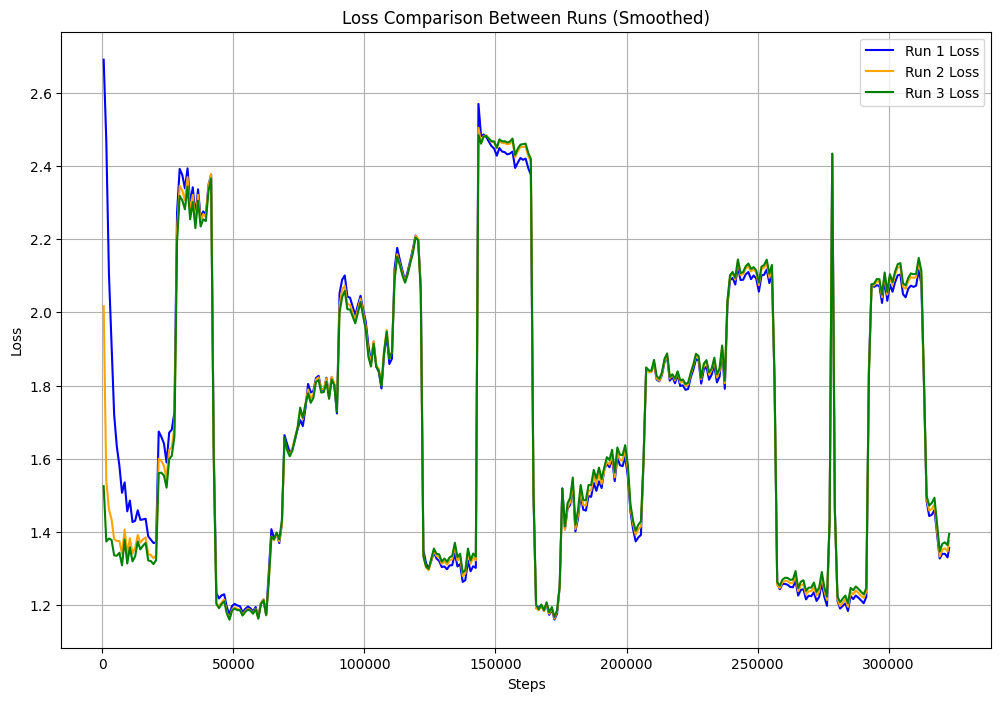

In [12]:
import matplotlib.pyplot as plt
import re
import numpy as np

# Function to parse the file and extract step-loss pairs
def parse_loss_data(file_path, pattern):
    loss_data = {}
    with open(file_path, "r") as file:
        for line in file:
            match = pattern.search(line)
            if match:
                step = int(match.group(1))
                loss = float(match.group(2))
                loss_data[step] = loss  # Dictionary ensures unique steps
    return zip(*sorted(loss_data.items()))  # Sorted step-loss pairs

# Function to smooth data using moving average
def smooth_data(steps, losses, window_size):
    smoothed_steps = []
    smoothed_losses = []
    for i in range(0, len(steps), window_size):
        window_steps = steps[i:i+window_size]
        window_losses = losses[i:i+window_size]
        smoothed_steps.append(np.mean(window_steps))  # Average step
        smoothed_losses.append(np.mean(window_losses))  # Average loss
    return smoothed_steps, smoothed_losses

# File paths
file_path_1 = "run1.log"
file_path_2 = "run2.log"
file_path_3 = "run3.log"

# Regular expression to extract step and loss
pattern1 = re.compile(r"1\|(\d+)\|Loss:\s([\d.]+)")
pattern2 = re.compile(r"2\|(\d+)\|Loss:\s([\d.]+)")
pattern3 = re.compile(r"3\|(\d+)\|Loss:\s([\d.]+)")

# Parse the files
steps1, losses1 = parse_loss_data(file_path_1, pattern1)
steps2, losses2 = parse_loss_data(file_path_2, pattern2)
steps3, losses3 = parse_loss_data(file_path_3, pattern3)

# Smooth the data with a window size (e.g., every 500 steps)
window_size = 1000
smoothed_steps1, smoothed_losses1 = smooth_data(steps1, losses1, window_size)
smoothed_steps2, smoothed_losses2 = smooth_data(steps2, losses2, window_size)
smoothed_steps3, smoothed_losses3 = smooth_data(steps3, losses3, window_size)

# Plot the smoothed data
plt.figure(figsize=(12, 8))
plt.plot(smoothed_steps1, smoothed_losses1, label="Run 1 Loss", color="blue", linestyle="-")
plt.plot(smoothed_steps2, smoothed_losses2, label="Run 2 Loss", color="orange", linestyle="-")
plt.plot(smoothed_steps3, smoothed_losses3, label="Run 3 Loss", color="green", linestyle="-")

plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Loss Comparison Between Runs (Smoothed)")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
print(sum(losses1)/len(losses1),sum(losses2)/len(losses2),sum(losses3)/len(losses3),)

1.7095791340448736 1.6989844139284997 1.697427665816325
